Don't show the warning for using deprecated functions

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Importing libraries

In [2]:
import numpy as np
import csv
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import matplotlib
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
import platform
print('Python '+str(platform.python_version()))
print('Pandas '+str(pd.__version__))
print('NumPy '+str(np.__version__))
print('SkLearn '+str(sk.__version__))
print('Csv '+str(csv.__version__))
print('Matplotlib '+str(matplotlib.__version__))

Python 3.6.9
Pandas 1.0.3
NumPy 1.18.2
SkLearn 0.22.2.post1
Csv 1.0
Matplotlib 3.2.1


In case if want to test undersampling

In [4]:
def undersample_df(X,label):
    x = X.copy()
    y = label.copy()
    df = pd.concat([x,y],axis=1)
    num_pos = df.loc[df['not_commenter']== 1].shape[0]
    num_neg = df.loc[df['not_commenter']==-1].shape[0]
    
    if num_pos<num_neg:
        df1=df.loc[df['not_commenter']==-1].sample(n=num_pos)
        df2=df.loc[df['not_commenter']== 1]
    else:
        df1=df.loc[df['not_commenter']==-1]
        df2=df.loc[df['not_commenter']== 1].sample(n=num_neg)
    
    df = pd.concat([df1,df2])
    
    y = df['not_commenter'].to_frame()
    df = df.drop(columns=['not_commenter'])
    
    return df,y

# Logistic Regression

Receives two pandas dataframes X (features) and y (corresponding labels).

You can set the number of cross validation cv = 10 (standard)
Test size $0<test\_size<1$ is the ratio of the data to be used for test set (if not set is 0.2)

In [5]:
class LR:
    
    """
    X: an array containing the X for training and testing
    Y: an array containing the labels for training and testing
    """
    
    def __init__(self,X,Y,cv=10,test_size=0.2,undersample=False):
        self.X_df = X
        self.y_df = Y
        if undersample:
            self.X_df,self.y_df = undersample_df(self.X_df,self.y_df)
        self.X = self.X_df.to_numpy()
        self.y = self.y_df.to_numpy()
        self.model = LogisticRegressionCV(cv=cv,solver='lbfgs')
        self.trainX, self.testX, self.trainy, self.testy = train_test_split(self.X, self.y, test_size=test_size, random_state=2)
    
    def undersample(self):
        self.X_df, self.y_df = undesample_df(self.X_df, self.y_df)
        self.X = self.X_df.to_numpy()
        self.y = self.y_df.to_numpy()
    
    def train(self):
        print("Beginning trainning...")
        self.model.fit(self.trainX,self.trainy)
        self.train_acc = self.model.score(self.trainX,self.trainy)
        print("Training complete.\nAverage Score on 10-fold Cross Validation:")
        print("\t %.4f %%\n" % (self.train_acc*100))
    
    def test(self):
        print("Beginning testing...")
        self.test_score = self.model.score(self.testX,self.testy)
        self.acc = accuracy_score(self.testy,self.model.predict(self.testX))
        self.precision = precision_score(self.testy,self.model.predict(self.testX))
        self.recall = recall_score(self.testy,self.model.predict(self.testX))
        self.f1 = f1_score(self.testy,self.model.predict(self.testX))
        print("Testing complete.\nAverage Score on 10-fold Cross Validation:")
        print("\t %.4f %%\n" % (self.test_score*100))
        print("Accuracy:\t %.4f \n" % (self.acc))
        print("Precision:\t %.4f \n" % (self.precision))
        print("Recall:\t %.4f \n" % (self.recall))
        print("F1:\t %.4f \n" % (self.f1))
        
    def roc(self,filename = None):
        print("Plotting ROC Curve")
        scorey = self.model.decision_function(self.testX)
        n_classes = self.testy.shape[0]
        
        fpr, tpr, _ = roc_curve(self.testy, scorey)
        roc_auc = auc(fpr, tpr)
        
        self.fpr = fpr
        self.tpr = tpr
        self.auc = roc_auc
    
    def plot_roc(self):
        plt.figure()
        
        lw = 2
        
        plt.plot(self.fpr, self.tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % self.auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show();
    
    def save_plot(self,filename):
        plt.figure()
        lw = 2
        
        plt.plot(self.fpr, self.tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % self.auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show();
        
        if filename != None:
            print("Saving "+filename+"_ROC.png")
            plt.savefig('roc/'+filename+'.png')
            df1 = pd.DataFrame(self.fpr,columns=['FPR'])
            df2 = pd.DataFrame(self.tpr,columns=['TPR'])
            df = pd.concat([df1,df2],axis=1)
            print("Saving "+filename+"_ROC.csv")
            df.to_csv('roc_csv/'+filename+'.csv',index=False)

In [6]:
def save_csv(model,dictname,tablename):
    
    dict_models_nc = dictname
    models_nc = model
    
    names = [dict_models_nc[i] for i in dict_models_nc]
    acc_score = [models_nc[m].acc for m in models_nc]
    precision_score = [models_nc[m].precision for m in models_nc]
    recall_score = [models_nc[m].recall for m in models_nc]
    f1_score = [models_nc[m].f1 for m in models_nc]
    aucs = [models_nc[m].auc for m in models_nc]

    df_names = pd.DataFrame(names,columns=['Name'])
    df_acc = pd.DataFrame(acc_score,columns=['Accuracy'])
    df_precision = pd.DataFrame(precision_score,columns=['Precision'])
    df_recall = pd.DataFrame(recall_score,columns=['Recall'])
    df_f1 = pd.DataFrame(f1_score,columns=['F1'])
    df_AUCs = pd.DataFrame(aucs,columns=['AUC'])
    df =pd.concat([df_names,df_acc,df_precision,df_recall,df_f1,df_AUCs],axis=1)
    df.index+=1
    df.to_csv('results/'+tablename+'.csv',index=False)
    df_results = df
    
    return df_results

## Models without city_state and without PCA

In [7]:
models_nc = {}

dict_models_nc = {1:"Base",2:"BaseCampaign",3:"BaseCampaignBin",4:"BaseBow",5:"BaseBowBin"}

Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 86.2395 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 85.4914 %

Accuracy:	 0.8549 

Precision:	 0.7474 

Recall:	 0.1695 

F1:	 0.2763 

Plotting ROC Curve


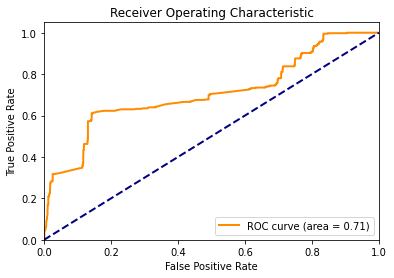

Saving 1-B_ROC.png
Saving 1-B_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 95.4262 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 95.7488 %

Accuracy:	 0.9575 

Precision:	 0.8954 

Recall:	 0.8377 

F1:	 0.8656 

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

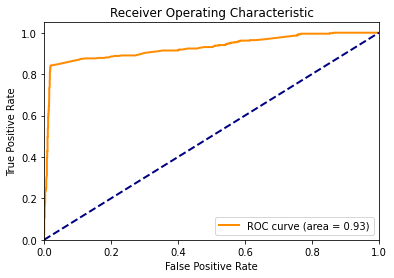

Saving 2-B_ROC.png
Saving 2-B_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 95.4262 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 95.7488 %

Accuracy:	 0.9575 

Precision:	 0.8954 

Recall:	 0.8377 

F1:	 0.8656 

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

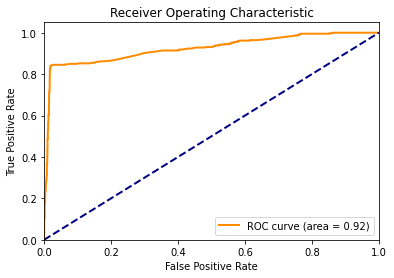

Saving 3-B_ROC.png
Saving 3-B_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 94.6557 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 95.2028 %

Accuracy:	 0.9520 

Precision:	 0.8915 

Recall:	 0.8043 

F1:	 0.8457 

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

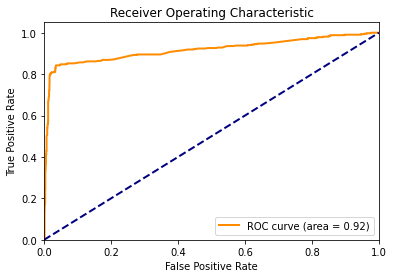

Saving 4-B_ROC.png
Saving 4-B_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 94.7435 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 95.3588 %

Accuracy:	 0.9536 

Precision:	 0.8989 

Recall:	 0.8067 

F1:	 0.8503 

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

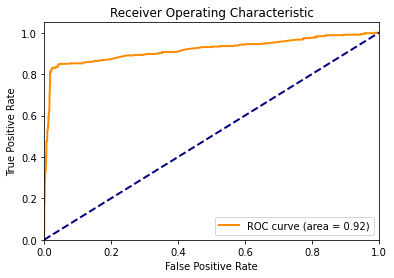

Saving 5-B_ROC.png
Saving 5-B_ROC.csv


<Figure size 432x288 with 0 Axes>

In [8]:
models_nc[1] = LR(pd.read_csv('db/B1.csv'),pd.read_csv('db/Y.csv'))
models_nc[1].train()
models_nc[1].test()
models_nc[1].roc()
models_nc[1].save_plot(filename='1-B')
              
models_nc[2] = LR(pd.read_csv('db/B2.csv'),pd.read_csv('db/Y.csv'))
models_nc[2].train()
models_nc[2].test()
models_nc[2].roc()
models_nc[2].save_plot(filename='2-B')
              
models_nc[3] = LR(pd.read_csv('db/B3.csv'),pd.read_csv('db/Y.csv'))
models_nc[3].train()
models_nc[3].test()
models_nc[3].roc()
models_nc[3].save_plot(filename='3-B')

models_nc[4] = LR(pd.read_csv('db/B4.csv'),pd.read_csv('db/Y.csv'))
models_nc[4].train()
models_nc[4].test()
models_nc[4].roc()
models_nc[4].save_plot(filename='4-B')
              
models_nc[5] = LR(pd.read_csv('db/B5.csv'),pd.read_csv('db/Y.csv'))
models_nc[5].train()
models_nc[5].test()
models_nc[5].roc()
models_nc[5].save_plot(filename='5-B')

In [9]:
save_csv(models_nc,dict_models_nc,'TableResultsNC')

,Name,Accuracy,Precision,Recall,F1,AUC
1,Base,0.854914,0.747368,0.169451,0.276265,0.707594
2,BaseCampaign,0.957488,0.895408,0.837709,0.865598,0.927906
3,BaseCampaignBin,0.957488,0.895408,0.837709,0.865598,0.924437
4,BaseBow,0.952028,0.891534,0.804296,0.845671,0.916585
5,BaseBowBin,0.953588,0.898936,0.806683,0.850314,0.918093


## Models without city_state and with PCA

In [10]:
models_ncpca = {}

dict_models_ncpca = {1:"Base",2:"BaseCampaign",3:"BaseCampaignBin",4:"BaseBow",5:"BaseBowBin"}

Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 84.1525 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 83.6973 %

Accuracy:	 0.8370 

Precision:	 0.0000 

Recall:	 0.0000 

F1:	 0.0000 

Plotting ROC Curve


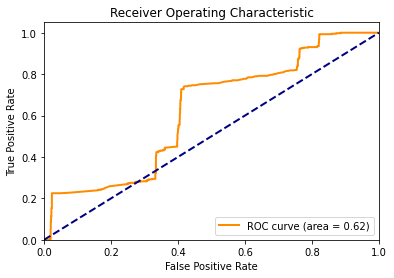

Saving 1-PCA_ROC.png
Saving 1-PCA_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 95.5530 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 95.2418 %

Accuracy:	 0.9524 

Precision:	 0.8756 

Recall:	 0.8254 

F1:	 0.8498 

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

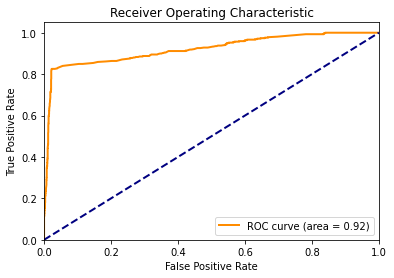

Saving 2-PCA_ROC.png
Saving 2-PCA_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 95.5530 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 95.2418 %

Accuracy:	 0.9524 

Precision:	 0.8756 

Recall:	 0.8254 

F1:	 0.8498 

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

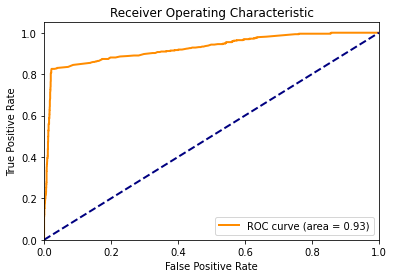

Saving 3-PCA_ROC.png
Saving 3-PCA_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 93.4952 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 92.9407 %

Accuracy:	 0.9294 

Precision:	 0.8516 

Recall:	 0.6866 

F1:	 0.7603 

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

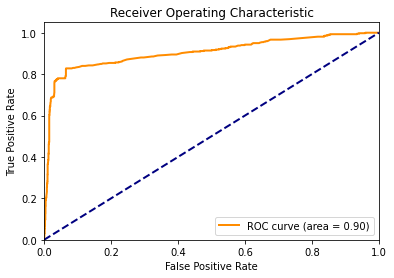

Saving 4-PCA_ROC.png
Saving 4-PCA_ROC.csv
Beginning trainning...
Training complete.
Average Score on 10-fold Cross Validation:
	 93.9828 %

Beginning testing...
Testing complete.
Average Score on 10-fold Cross Validation:
	 93.8768 %

Accuracy:	 0.9388 

Precision:	 0.8718 

Recall:	 0.7321 

F1:	 0.7958 

Plotting ROC Curve


<Figure size 432x288 with 0 Axes>

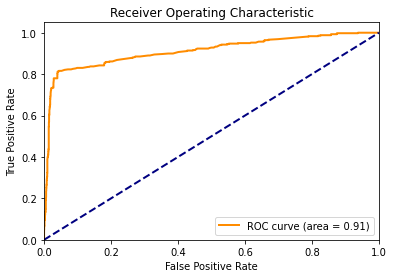

Saving 5-PCA_ROC.png
Saving 5-PCA_ROC.csv


<Figure size 432x288 with 0 Axes>

In [11]:
models_ncpca[1] = LR(pd.read_csv('db/PCANC/XPCANC_0.csv'),pd.read_csv('db/PCANC/yPCANC_0.csv'))
models_ncpca[1].train()
models_ncpca[1].test()
models_ncpca[1].roc()
models_ncpca[1].save_plot(filename='1-PCA')

models_ncpca[2] = LR(pd.read_csv('db/PCANC/XPCANC_1.csv'),pd.read_csv('db/PCANC/yPCANC_1.csv'))
models_ncpca[2].train()
models_ncpca[2].test()
models_ncpca[2].roc()
models_ncpca[2].save_plot(filename='2-PCA')

models_ncpca[3] = LR(pd.read_csv('db/PCANC/XPCANC_2.csv'),pd.read_csv('db/PCANC/yPCANC_2.csv'))
models_ncpca[3].train()
models_ncpca[3].test()
models_ncpca[3].roc()
models_ncpca[3].save_plot(filename='3-PCA')

models_ncpca[4] = LR(pd.read_csv('db/PCANC/XPCANC_3.csv'),pd.read_csv('db/PCANC/yPCANC_3.csv'))
models_ncpca[4].train()
models_ncpca[4].test()
models_ncpca[4].roc()
models_ncpca[4].save_plot(filename='4-PCA')

models_ncpca[5] = LR(pd.read_csv('db/PCANC/XPCANC_4.csv'),pd.read_csv('db/PCANC/yPCANC_4.csv'))
models_ncpca[5].train()
models_ncpca[5].test()
models_ncpca[5].roc()
models_ncpca[5].save_plot(filename='5-PCA')

In [12]:
save_csv(models_ncpca,dict_models_ncpca,'TableResultsNCPCA')

,Name,Accuracy,Precision,Recall,F1,AUC
1,Base,0.836973,0.000000,0.000000,0.000000,0.621150
2,BaseCampaign,0.952418,0.875635,0.825359,0.849754,0.920981
3,BaseCampaignBin,0.952418,0.875635,0.825359,0.849754,0.925459
4,BaseBow,0.929407,0.851632,0.686603,0.760265,0.904661
5,BaseBowBin,0.938768,0.871795,0.732057,0.795839,0.911620


Save the resulting models in pickle

In [13]:
path = 'models/'
for i in models_nc:
    pickle.dump(models_nc[i].model, open( path+'b'+str(i)+'.p', "wb" ))

for i in models_ncpca:
    pickle.dump(models_ncpca[i].model, open( path+'pca'+str(i)+'.p', "wb" ))